### Preparation

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
pd.set_option('display.max_columns', None)

In [50]:
df = pd.read_csv('../data/raw_data/new_properties_1.csv', engine='python', encoding='utf8', error_bad_lines=False)[:600]
df


C:\Users\zzbri\AppData\Local\Temp\ipykernel_17204\962151318.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../data/raw_data/new_properties_1.csv', engine='python', encoding='utf8', error_bad_lines=False)[:600]
Skipping line 8236: unexpected end of data


,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking,lon,lat,revcoord,dis_to_melCBD,school,park,supermarket,cinema,postalcode
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,1,1,144.953869,-37.815014,"(144.9538694, -37.8150137)",1424,11,170,48,7,VIC 3000
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,1,0,144.958903,-37.808205,"(144.9589035, -37.8082052)",1241,16,166,48,7,VIC 3000
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,2,0,144.968287,-37.807896,"(144.9682873, -37.8078956)",1692,19,173,54,6,VIC 3000
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,1,1,144.952095,-37.813775,"(144.9520948, -37.813775)",1612,10,108,44,6,VIC 3000
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,1,0,144.967907,-37.813860,"(144.9679067, -37.8138601)",627,13,146,49,7,VIC 3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,38/400 Victoria Parade East Melbourne VIC 3002,$770 per week,"[-37.8095627, 144.9848541]",Apartment / Unit / Flat,3080.0,"['INSIDE:', 'Gym', 'Intercom', 'Built in wardr...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,770.0,3,2,2,144.984854,-37.809563,"(144.9848541, -37.8095627)",2626,25,131,54,8,VIC 3002
596,P08P/191 Powlett Street East Melbourne VIC 3002,$625 per week,"[-37.8100943, 144.9860492]",Apartment / Unit / Flat,2500.0,"['INSIDE:', 'Intercom', 'Floorboards', 'Dishwa...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,625.0,2,1,1,144.986049,-37.810094,"(144.9860492, -37.8100943)",2814,29,148,54,8,VIC 3002
597,Unit 101/170 Albert St East Melbourne VIC 3002,$440 per week,"[-37.809620699999996, 144.985273]",Apartment / Unit / Flat,1907.0,['Secure Parking'],[],"['***INSPECTIONS***', 'To register to inspect,...",440.0,1,1,1,144.985273,-37.809621,"(144.985273, -37.809620699999996)",2664,21,122,52,6,VIC 3002
598,203/150 Clarendon Street East Melbourne VIC 3002,$950 per week,"[-37.8120899, 144.9835967]",Apartment / Unit / Flat,3800.0,"['INSIDE:', 'Gym', 'Intercom', 'Study', 'Floor...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,950.0,1,1,1,144.983597,-37.812090,"(144.9835967, -37.8120899)",2820,16,101,40,5,VIC 3002


### Feature Extraction

In [3]:
if_AC = []
if_Ensuite = []
if_Furnished = []
if_Heating = []
if_SecureParking = []
if_ClosetoShops = []
if_ClosetoSchools = []
if_ClosetoTrans = []

for feature in df['features']:

    if 'Air conditioning' in feature:
        if_AC.append(1)
    else:
        if_AC.append(0)


    if 'Ensuite' in feature:
        if_Ensuite.append(1)
    else:
        if_Ensuite.append(0)


    if 'Furnished' in feature:
        if_Furnished.append(1)
    else:
        if_Furnished.append(0)


    if 'Heating' in feature:
        if_Heating.append(1)
    else:
        if_Heating.append(0)

    if 'Secure Parking' in feature:
        if_SecureParking.append(1)
    else:
        if_SecureParking.append(0)

    if 'Close to shops' in feature:
        if_ClosetoShops.append(1)
    else:
        if_ClosetoShops.append(0)

    if 'Close to schools' in feature:
        if_ClosetoSchools.append(1)
    else:
        if_ClosetoSchools.append(0)

    if 'Close to transport' in feature:
        if_ClosetoTrans.append(1)
    else:
        if_ClosetoTrans.append(0)

df_feature = {'if_AC': if_AC, 'if_Ensuite': if_Ensuite, 'if_Furnished': if_Furnished, 'if_Heating': if_Heating,  'if_SecureParking': if_SecureParking, 'if_ClosetoShops': if_ClosetoShops, 'if_ClosetoSchools': if_ClosetoSchools, 'if_ClosetoTrans': if_ClosetoTrans}
df_feature = pd.DataFrame(df_feature)

df = pd.concat([df, df_feature], axis=1)

df


,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking,lon,lat,revcoord,dis_to_melCBD,school,park,supermarket,cinema,postalcode,if_AC,if_Ensuite,if_Furnished,if_Heating,if_SecureParking,if_ClosetoShops,if_ClosetoSchools,if_ClosetoTrans
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,1,1,144.953869,-37.815014,"(144.9538694, -37.8150137)",1424,11,170,48,7,VIC 3000,0,0,0,0,0,0,0,0
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,1,0,144.958903,-37.808205,"(144.9589035, -37.8082052)",1241,16,166,48,7,VIC 3000,0,0,0,0,0,0,0,0
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,2,0,144.968287,-37.807896,"(144.9682873, -37.8078956)",1692,19,173,54,6,VIC 3000,0,0,1,0,0,0,0,0
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,1,1,144.952095,-37.813775,"(144.9520948, -37.813775)",1612,10,108,44,6,VIC 3000,0,0,0,0,0,0,0,0
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,1,0,144.967907,-37.813860,"(144.9679067, -37.8138601)",627,13,146,49,7,VIC 3000,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,38/400 Victoria Parade East Melbourne VIC 3002,$770 per week,"[-37.8095627, 144.9848541]",Apartment / Unit / Flat,3080.0,"['INSIDE:', 'Gym', 'Intercom', 'Built in wardr...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,770.0,3,2,2,144.984854,-37.809563,"(144.9848541, -37.8095627)",2626,25,131,54,8,VIC 3002,0,1,0,1,1,0,0,0
596,P08P/191 Powlett Street East Melbourne VIC 3002,$625 per week,"[-37.8100943, 144.9860492]",Apartment / Unit / Flat,2500.0,"['INSIDE:', 'Intercom', 'Floorboards', 'Dishwa...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,625.0,2,1,1,144.986049,-37.810094,"(144.9860492, -37.8100943)",2814,29,148,54,8,VIC 3002,0,0,0,0,1,0,0,0
597,Unit 101/170 Albert St East Melbourne VIC 3002,$440 per week,"[-37.809620699999996, 144.985273]",Apartment / Unit / Flat,1907.0,['Secure Parking'],[],"['***INSPECTIONS***', 'To register to inspect,...",440.0,1,1,1,144.985273,-37.809621,"(144.985273, -37.809620699999996)",2664,21,122,52,6,VIC 3002,0,0,0,0,1,0,0,0
598,203/150 Clarendon Street East Melbourne VIC 3002,$950 per week,"[-37.8120899, 144.9835967]",Apartment / Unit / Flat,3800.0,"['INSIDE:', 'Gym', 'Intercom', 'Study', 'Floor...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,950.0,1,1,1,144.983597,-37.812090,"(144.9835967, -37.8120899)",2820,16,101,40,5,VIC 3002,0,0,1,1,1,0,0,0


### calculate distance to MEL CBD

In [4]:
from geopy import distance

# print(geodesic((30.28708,120.12802999999997), (28.7427,115.86572000000001)).m) #计算两个坐标直线距离
dis_to_center = []
for i in range(df.shape[0]):
    lon = df['lon'][i]
    lat = df['lat'][i]
    dis = distance.distance((lon-90,lat), (144.9618789-90,-37.8152834)).m
    dis_to_center.append(dis)

df_dis_to_center = pd.DataFrame({'dis_to_center':dis_to_center})

df = pd.concat([df, df_dis_to_center], axis=1)

df
    

c:\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking,lon,lat,revcoord,dis_to_melCBD,school,park,supermarket,cinema,postalcode,if_AC,if_Ensuite,if_Furnished,if_Heating,if_SecureParking,if_ClosetoShops,if_ClosetoSchools,if_ClosetoTrans,dis_to_center
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,1,1,144.953869,-37.815014,"(144.9538694, -37.8150137)",1424,11,170,48,7,VIC 3000,0,0,0,0,0,0,0,0,891.806975
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,1,0,144.958903,-37.808205,"(144.9589035, -37.8082052)",1241,16,166,48,7,VIC 3000,0,0,0,0,0,0,0,0,561.509803
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,2,0,144.968287,-37.807896,"(144.9682873, -37.8078956)",1692,19,173,54,6,VIC 3000,0,0,1,0,0,0,0,0,856.064894
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,1,1,144.952095,-37.813775,"(144.9520948, -37.813775)",1612,10,108,44,6,VIC 3000,0,0,0,0,0,0,0,0,1093.470938
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,1,0,144.967907,-37.813860,"(144.9679067, -37.8138601)",627,13,146,49,7,VIC 3000,0,0,1,0,0,0,0,0,677.196148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,38/400 Victoria Parade East Melbourne VIC 3002,$770 per week,"[-37.8095627, 144.9848541]",Apartment / Unit / Flat,3080.0,"['INSIDE:', 'Gym', 'Intercom', 'Built in wardr...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,770.0,3,2,2,144.984854,-37.809563,"(144.9848541, -37.8095627)",2626,25,131,54,8,VIC 3002,0,1,0,1,1,0,0,0,2583.770804
596,P08P/191 Powlett Street East Melbourne VIC 3002,$625 per week,"[-37.8100943, 144.9860492]",Apartment / Unit / Flat,2500.0,"['INSIDE:', 'Intercom', 'Floorboards', 'Dishwa...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,625.0,2,1,1,144.986049,-37.810094,"(144.9860492, -37.8100943)",2814,29,148,54,8,VIC 3002,0,0,0,0,1,0,0,0,2711.151624
597,Unit 101/170 Albert St East Melbourne VIC 3002,$440 per week,"[-37.809620699999996, 144.985273]",Apartment / Unit / Flat,1907.0,['Secure Parking'],[],"['***INSPECTIONS***', 'To register to inspect,...",440.0,1,1,1,144.985273,-37.809621,"(144.985273, -37.809620699999996)",2664,21,122,52,6,VIC 3002,0,0,0,0,1,0,0,0,2629.426289
598,203/150 Clarendon Street East Melbourne VIC 3002,$950 per week,"[-37.8120899, 144.9835967]",Apartment / Unit / Flat,3800.0,"['INSIDE:', 'Gym', 'Intercom', 'Study', 'Floor...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,950.0,1,1,1,144.983597,-37.812090,"(144.9835967, -37.8120899)",2820,16,101,40,5,VIC 3002,0,0,1,1,1,0,0,0,2426.324961


In [5]:
def get_postalcode(name):
    return name[-8:].strip('VIC')
df['postalcode'] = df.name.apply(get_postalcode)  # extract postalcode from name

In [6]:
df['costs'].describe()

count     589.000000
mean      591.935484
std       352.358032
min         1.000000
25%       450.000000
50%       550.000000
75%       650.000000
max      4500.000000
Name: costs, dtype: float64

In [52]:
df_vic3000 = df[:] # Take first 100 apartments as examples which are all from VIC 3000
df_vic3000

,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking,lon,lat,revcoord,dis_to_melCBD,school,park,supermarket,cinema,postalcode
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,1,1,144.953869,-37.815014,"(144.9538694, -37.8150137)",1424,11,170,48,7,VIC 3000
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,1,0,144.958903,-37.808205,"(144.9589035, -37.8082052)",1241,16,166,48,7,VIC 3000
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,2,0,144.968287,-37.807896,"(144.9682873, -37.8078956)",1692,19,173,54,6,VIC 3000
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,1,1,144.952095,-37.813775,"(144.9520948, -37.813775)",1612,10,108,44,6,VIC 3000
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,1,0,144.967907,-37.813860,"(144.9679067, -37.8138601)",627,13,146,49,7,VIC 3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,38/400 Victoria Parade East Melbourne VIC 3002,$770 per week,"[-37.8095627, 144.9848541]",Apartment / Unit / Flat,3080.0,"['INSIDE:', 'Gym', 'Intercom', 'Built in wardr...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,770.0,3,2,2,144.984854,-37.809563,"(144.9848541, -37.8095627)",2626,25,131,54,8,VIC 3002
596,P08P/191 Powlett Street East Melbourne VIC 3002,$625 per week,"[-37.8100943, 144.9860492]",Apartment / Unit / Flat,2500.0,"['INSIDE:', 'Intercom', 'Floorboards', 'Dishwa...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,625.0,2,1,1,144.986049,-37.810094,"(144.9860492, -37.8100943)",2814,29,148,54,8,VIC 3002
597,Unit 101/170 Albert St East Melbourne VIC 3002,$440 per week,"[-37.809620699999996, 144.985273]",Apartment / Unit / Flat,1907.0,['Secure Parking'],[],"['***INSPECTIONS***', 'To register to inspect,...",440.0,1,1,1,144.985273,-37.809621,"(144.985273, -37.809620699999996)",2664,21,122,52,6,VIC 3002
598,203/150 Clarendon Street East Melbourne VIC 3002,$950 per week,"[-37.8120899, 144.9835967]",Apartment / Unit / Flat,3800.0,"['INSIDE:', 'Gym', 'Intercom', 'Study', 'Floor...",[],['**ARRANGE AN INSPECTION TIME ONLINE - DETAIL...,950.0,1,1,1,144.983597,-37.812090,"(144.9835967, -37.8120899)",2820,16,101,40,5,VIC 3002


### EDA & Feature Engineering

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


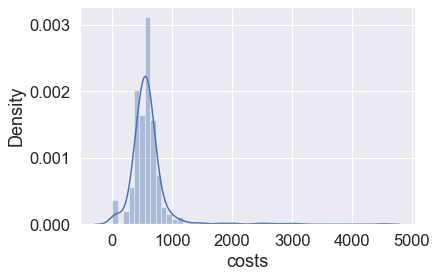

In [53]:
df_vic3000['bond'] = df_vic3000['bond'].transform(lambda x: x.fillna(x.median()))
df_vic3000['costs'] = df_vic3000['costs'].transform(lambda x: x.fillna(x.median())) 

# df_vic3000['costs']= np.log(df_vic3000.costs)

sns.distplot(df_vic3000['costs'])
plt.show()

In [9]:
df_vic3000.columns

Index(['name', 'cost_text', 'coordinates', 'type', 'bond', 'features',
       'unverified_features', 'desc', 'costs', 'beds', 'baths', 'parking',
       'lon', 'lat', 'revcoord', 'dis_to_melCBD', 'school', 'park',
       'supermarket', 'cinema', 'postalcode', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_SecureParking', 'if_ClosetoShops',
       'if_ClosetoSchools', 'if_ClosetoTrans', 'dis_to_center'],
      dtype='object')

In [10]:
df_vic3000.drop(['name','cost_text','coordinates','features','unverified_features','desc','lon','lat','revcoord','if_ClosetoSchools','if_SecureParking','supermarket'],axis=1,inplace=True)
df_vic3000

,type,bond,costs,beds,baths,parking,dis_to_melCBD,school,park,cinema,postalcode,if_AC,if_Ensuite,if_Furnished,if_Heating,if_ClosetoShops,if_ClosetoTrans,dis_to_center
0,Apartment / Unit / Flat,261.0,4.094345,1,1,1,1424,11,170,7,3000,0,0,0,0,0,0,891.806975
1,Apartment / Unit / Flat,1320.0,5.799093,1,1,0,1241,16,166,7,3000,0,0,0,0,0,0,561.509803
2,Apartment / Unit / Flat,2607.0,6.396930,2,2,0,1692,19,173,6,3000,0,0,1,0,0,0,856.064894
3,Apartment / Unit / Flat,2216.0,6.234411,2,1,1,1612,10,108,6,3000,0,0,0,0,0,0,1093.470938
4,Apartment / Unit / Flat,2173.0,6.214608,1,1,0,627,13,146,7,3000,0,0,1,0,0,0,677.196148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Apartment / Unit / Flat,3080.0,6.646391,3,2,2,2626,25,131,8,3002,0,1,0,1,0,0,2583.770804
596,Apartment / Unit / Flat,2500.0,6.437752,2,1,1,2814,29,148,8,3002,0,0,0,0,0,0,2711.151624
597,Apartment / Unit / Flat,1907.0,6.086775,1,1,1,2664,21,122,6,3002,0,0,0,0,0,0,2629.426289
598,Apartment / Unit / Flat,3800.0,6.856462,1,1,1,2820,16,101,5,3002,0,0,1,1,0,0,2426.324961


#### Filling in missing feature values

In [11]:
df_vic3000.isnull().sum() 

type               0
bond               0
costs              0
beds               0
baths              0
parking            0
dis_to_melCBD      0
school             0
park               0
cinema             0
postalcode         0
if_AC              0
if_Ensuite         0
if_Furnished       0
if_Heating         0
if_ClosetoShops    0
if_ClosetoTrans    0
dis_to_center      0
dtype: int64

In [12]:
df_vic3000['bond'] = df_vic3000['bond'].transform(lambda x: x.fillna(x.median()))
df_vic3000['costs'] = df_vic3000['costs'].transform(lambda x: x.fillna(x.median())) 
# filling missing features with median

In [13]:
df_vic3000.isnull().sum() # check again

type               0
bond               0
costs              0
beds               0
baths              0
parking            0
dis_to_melCBD      0
school             0
park               0
cinema             0
postalcode         0
if_AC              0
if_Ensuite         0
if_Furnished       0
if_Heating         0
if_ClosetoShops    0
if_ClosetoTrans    0
dis_to_center      0
dtype: int64

### Feature Analysis

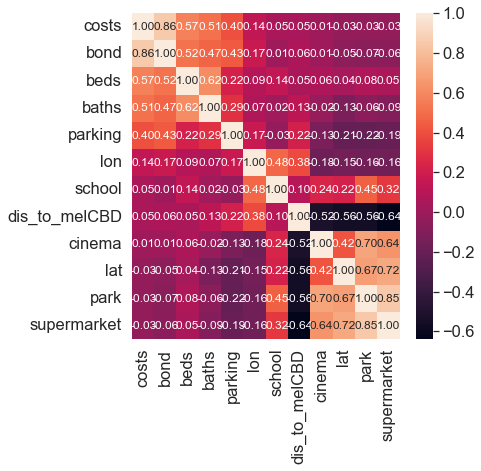

In [54]:
plt.figure(figsize=(6, 6))
corrmat = df_vic3000.corr() # Draw corrmat and sort by corr
k = 20
cols = corrmat.nlargest(k,'costs')['costs'].index
c = np.corrcoef(df_vic3000[cols].values.T)
sns.set(font_scale=1.5)
h = sns.heatmap(c, annot=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the heatmap, 'bond' is strongly correlated with 'costs'.'parking','beds','baths' also have relatively high correlation with 'costs'.

### Price forecasting

In [15]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from numpy.core.fromnumeric import shape
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from matplotlib.colors import ListedColormap
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from pandas import Series, DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### Linear Regression

R2 Value: 0.71543513684339
MSE: 0.7168584853452586


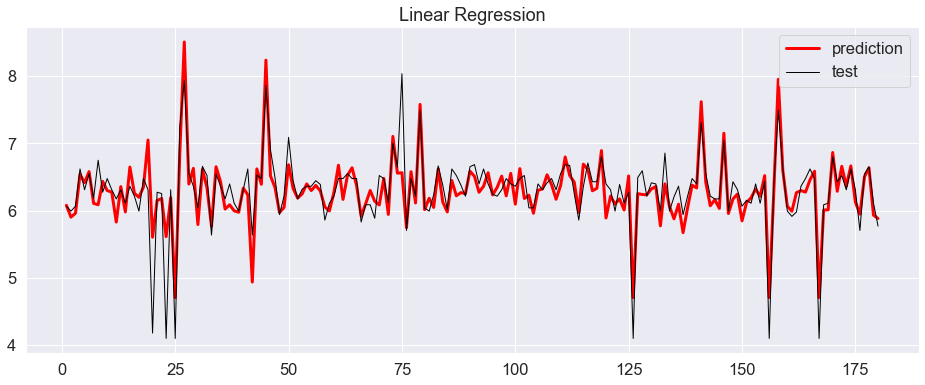

In [16]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


model = clf.fit(X_train,y_train)

predictions = model.predict(X_test) #making predictions using best-performing model


print('R2 Value:',metrics.r2_score(y_test, model.predict(X_test)))
print('MSE:',metrics.explained_variance_score(y_test, model.predict(X_test)))

plt.figure(figsize=(16, 6))
plt.title('Linear Regression')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, predictions, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()


### Random Forest

c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.3124639258611636,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.05068599769657197,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 160,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
R2 Value: 0.7686411633238939
MSE: 0.7686411841339436


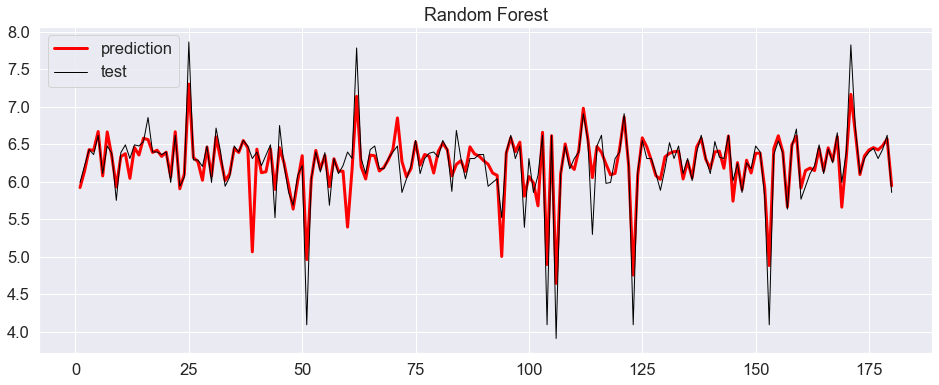

In [17]:
X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model_params = {
    'n_estimators': randint(4,200), #sampling numbers 4-204
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1), #distributed max_features, mean = 0.25, standard deviation = 0.1 range 0-1
    'min_samples_split': uniform(0.01, 0.199) #uniform distribution 0.01-0.2
}


rf_model = RandomForestRegressor() #create random forest model
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1) #perform 5-folds cross-validation

model = clf.fit(X_train, y_train) #training the model

from pprint import pprint
pprint(model.best_estimator_.get_params()) #print best parameters

predictions = model.predict(X_test) #making predictions using best-performing model


print('R2 Value:',metrics.r2_score(y_test, model.predict(X_test)))
print('MSE:',metrics.explained_variance_score(y_test, model.predict(X_test)))
# plt.scatter(X_test['baths'], y_test,  color='black')
# plt.scatter(X_test['baths'], prediction,  color='blue')
# # plt.plot(X_test['beds'], prediction, color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.show()

plt.figure(figsize=(16, 6))
plt.title('Random Forest')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, predictions, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()

### Decision Tree

R2 Value: 0.4944417306231571
MSE: 0.494736481157392


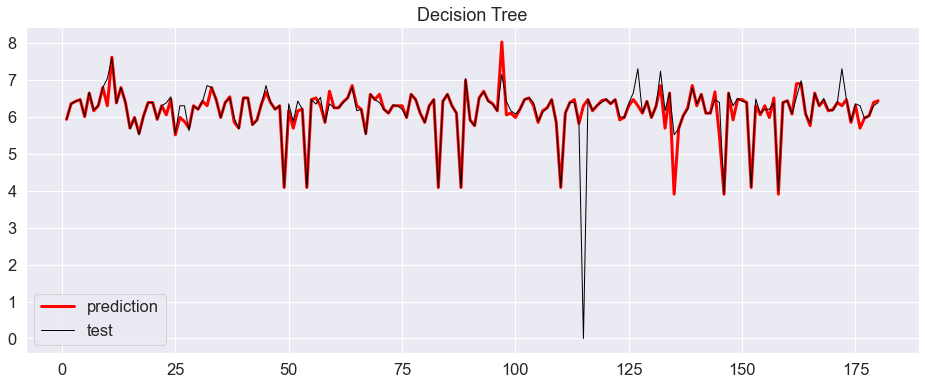

In [18]:
from sklearn.tree import DecisionTreeRegressor

X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

clf = DecisionTreeRegressor()

model = clf.fit(X_train,y_train)

predictions = model.predict(X_test) #making predictions using best-performing model


print('R2 Value:',metrics.r2_score(y_test, model.predict(X_test)))
print('MSE:',metrics.explained_variance_score(y_test, model.predict(X_test)))

plt.figure(figsize=(16, 6))
plt.title('Decision Tree')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, predictions, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()


## Ensemble Learning

### GBRT

c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Value: 0.8323932838081616
MSE: 0.8344767567141114


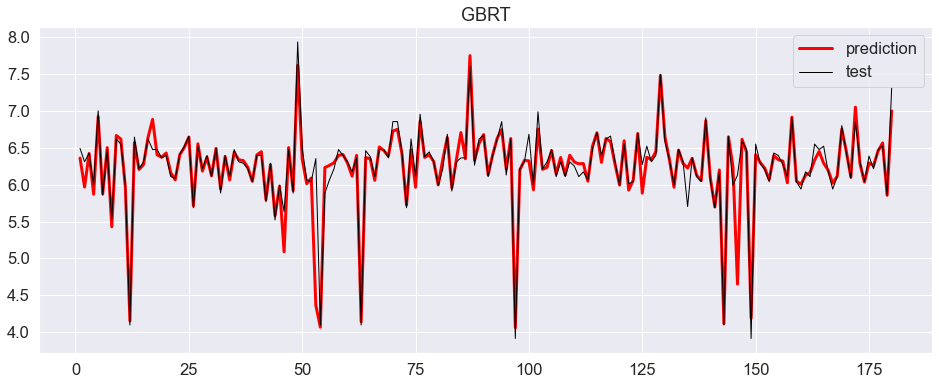

In [26]:
from sklearn import ensemble


X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#
clf = ensemble.GradientBoostingRegressor(n_estimators=100)

model = clf.fit(X_train,y_train)

predictions = model.predict(X_test) #making predictions using best-performing model


print('R2 Value:',metrics.r2_score(y_test, model.predict(X_test)))
print('MSE:',metrics.explained_variance_score(y_test, model.predict(X_test)))

plt.figure(figsize=(16, 6))
plt.title('GBRT')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, predictions, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()

### xgboost

[01:39:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.8660796286225927
MSE: 0.04836375455920206


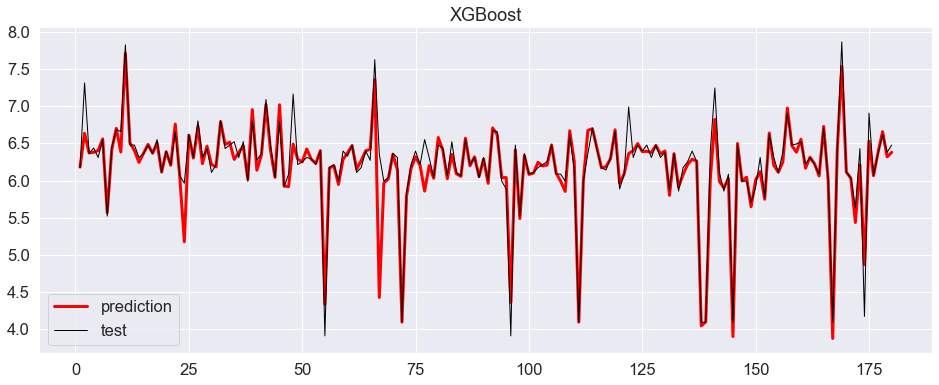

In [27]:
X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

print('R2 Value:',metrics.r2_score(y_test, XGB.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test, XGB.predict(X_test)))


plt.figure(figsize=(16, 6))
plt.title('XGBoost')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, prediction, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()

### Bagging

R2 Value: 0.8364855536414856
MSE: 0.04947920309957757


c:\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


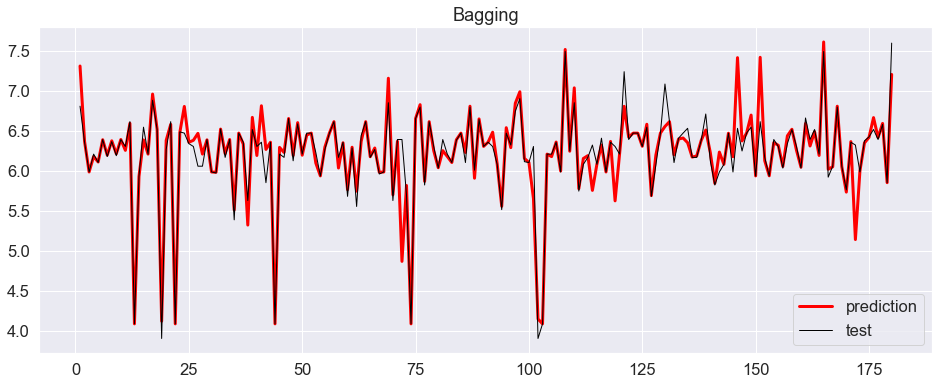

In [44]:
from sklearn.ensemble import BaggingRegressor


X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

clf = BaggingRegressor()

model=clf.fit(X_train,y_train)
prediction=model.predict(X_test)

print('R2 Value:',metrics.r2_score(y_test, model.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test, model.predict(X_test)))


plt.figure(figsize=(16, 6))
plt.title('Bagging')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, prediction, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()

### DT K-fold

R2 Value: 0.8756934658678867
MSE: 0.03237614381790557


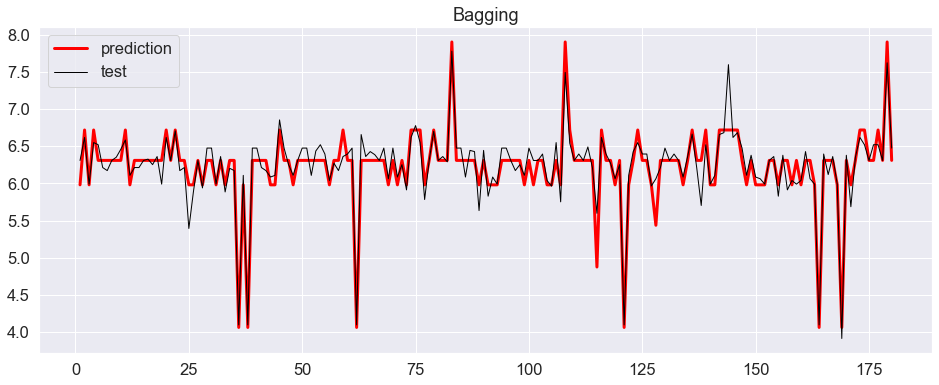

In [49]:
from sklearn.ensemble import BaggingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

%matplotlib inline

X=df_vic3000[['type', 'bond',  'dis_to_melCBD','beds', 'baths', 'parking',
       'school', 'park', 'cinema', 'if_AC', 'if_Ensuite',
       'if_Furnished', 'if_Heating', 'if_ClosetoShops', 'if_ClosetoTrans']]
y=df_vic3000[['costs']]
cat_attributes=['type']
X=pd.get_dummies(X,columns=cat_attributes)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# 决定系数计算
def performance_metric(y_true, y_predict):
    score = metrics.r2_score(y_true, y_predict)
    return score

# 训练最优模型
def fit_model(X, y):
    cross_validator = KFold(n_splits=10, random_state=1, shuffle=True)
    
    regressor = DecisionTreeRegressor()
    
    params = { 'max_depth': range(1,11) }

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)

    # 返回网格搜索后的最优模型
    return grid.best_estimator_

# 基于训练数据，获得最优模型
model = fit_model(X_train, y_train)
prediction=model.predict(X_test)

print('R2 Value:',metrics.r2_score(y_test, model.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test, model.predict(X_test)))


plt.figure(figsize=(16, 6))
plt.title('Bagging')
x=np.arange(1,X_test.shape[0]+1) 
plt.plot(x, prediction, color='red', linewidth=3, label='prediction')
plt.plot(x, y_test, color='black', linewidth=1, label='test')
plt.legend()
plt.show()